**Machine Learning- Introduction + Evaluation methods and metrics**

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
print(data.target[[10,50,85]]) # Class' list

[0 1 0]


In [ ]:
print(data.feature_names) # Attribute's names

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
list(data.target_names)

['malignant', 'benign']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


**Let's create and train a model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0) # Departure point

**Fit the model on the training data**

In [ ]:
model = dt.fit(X_train, y_train)

**Let's use our model for prediction on the test set**

In [ ]:
prediction = dt.predict(X_test) # Prediction on the 114 instance's test
print(prediction)

[1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1
 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1
 1 1 0]


**Let's checkout the performance of our model (accuracy)**

In [ ]:
print("Score:", model.score(X_test, y_test))

Score: 0.9473684210526315


**Try other metrics**


In [ ]:
from sklearn import metrics
print("Classification Accuracy :\n", metrics.accuracy_score(y_test, prediction))
print("Classification F1-score :\n", metrics.f1_score(y_test, prediction))

#or
print("Classification report:\n", metrics.classification_report(y_test, prediction))

Classification Accuracy :
 0.9473684210526315
Classification F1-score :
 0.9558823529411765
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.96      0.96      0.96        68

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



**Confusion matrix**

In [ ]:
print("Confusion matrix\n", metrics.confusion_matrix(y_test, prediction))

Confusion matrix
 [[43  3]
 [ 3 65]]


**Plot the confusion matrix**

Confusion matrix (without normalisation
[[43  3]
 [ 3 65]]


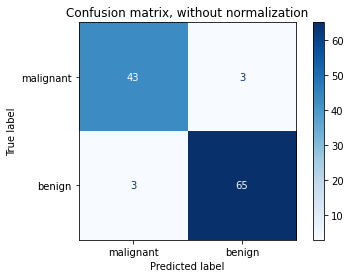

Confusion matrix (normalized)
[[0.93478261 0.06521739]
 [0.04411765 0.95588235]]


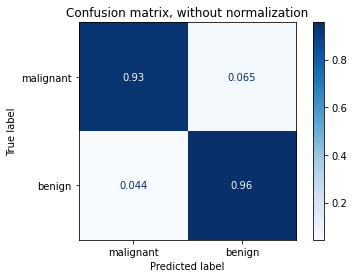

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

titles_options=[("Confusion matrix (without normalisation", None),
                ("Confusion matrix (normalized)", 'true')]
for title, normalize in titles_options:
  disp= metrics.plot_confusion_matrix(model, X_test, y_test,
                                      display_labels=data.target_names,
                                      cmap=plt.cm.Blues,
                                      normalize=normalize)
  disp.ax_.set_title("Confusion matrix, without normalization")
  print(title)
  print(disp.confusion_matrix)
  plt.show()



## **K-Folds Cross Validation**
-We use k-1 subsets for train our model and leave the last subset for testing

-We repeat the evaluation k times and average the performance results

In [ ]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5)
kf.get_n_splits()

5

In [ ]:
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


**Let's split our dataset**


**Question :** Add the code to compute the model performance using this k-fold CV

In [ ]:
for train_index, test_index in kf.split(data.data) :
  X_train, X_test = data.data[train_index], data.data[test_index]
  y_train, y_test = data.target[train_index], data.target[test_index]

**Let's create and train a model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

dt = DecisionTreeClassifier()
accuracies = []

for train_index, test_index in kf.split(data.data) :
  # print ("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = data.data[train_index], data.data[test_index]
  y_train, y_test = data.target[train_index], data.target[test_index]

  model = dt.fit(X_train, y_train)
  prediction = model.predict(X_test)

  score = metrics.accuracy_score(y_test, prediction)
  accuracies.append(score)

  print(accuracies)
  print(sum(accuracies)/len(accuracies))


[0.8596491228070176]
0.8596491228070176
[0.8596491228070176, 0.9035087719298246]
0.881578947368421
[0.8596491228070176, 0.9035087719298246, 0.9473684210526315]
0.9035087719298245
[0.8596491228070176, 0.9035087719298246, 0.9473684210526315, 0.9210526315789473]
0.9078947368421052
[0.8596491228070176, 0.9035087719298246, 0.9473684210526315, 0.9210526315789473, 0.8938053097345132]
0.9050768514205869


Leave one out validation LOO or LOOCV


LOO is another CV technique, except that in this type of cross validation, the number of folds (subsets) equals to the number of observations in the dataset


In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(data.data)

569

In [ ]:
for train_index, test_index in loo.split(data.data) :
  X_train, X_test = data.data[train_index], data.data[test_index]
  y_train, y_test = data.target[train_index], data.target[test_index]


Question : Add the code to compute the model performance using this LOO CV

In [ ]:
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
accuracies = []

for train_index, test_index in loo.split(data.data) :
  X_train, X_test = data.data[train_index], data.data[test_index]
  y_train, y_test = data.target[train_index], data.target[test_index]
  dt.fit(X_train, y_train)
  prediction = dt.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, prediction))

  print(accuracies)
  print("Average accuracy is:" + str(sum(accuracies)/len(accuracies)))

[1.0]
Average accuracy is:1.0
[1.0, 1.0]
Average accuracy is:1.0
[1.0, 1.0, 1.0]
Average accuracy is:1.0
[1.0, 1.0, 1.0, 1.0]
Average accuracy is:1.0
[1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy is:1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
Average accuracy is:0.8333333333333334
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]
Average accuracy is:0.8571428571428571
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]
Average accuracy is:0.875
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]
Average accuracy is:0.8888888888888888
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy is:0.9
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
Average accuracy is:0.8181818181818182
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]
Average accuracy is:0.8333333333333334
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]
Average accuracy is:0.8461538461538461
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]
Average accuracy is:0.7857142857142857
[1.0, 1.0, 1.0, 1.

Another way to perform cross validation is : 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(dt, data.data, data.target, cv=5)
print("Cross-validated scores:", scores)
print("Cross-validated mean scores", sum(scores)/len(scores))

Cross-validated scores: [0.90350877 0.92105263 0.9122807  0.94736842 0.90265487]
Cross-validated mean scores 0.9173730787144851
